# The Sparks Foundation 

# Data Science And Business Analytics Internship (july - 2022)


# Author : Manogna Nalluri


# Task 7: stock market prediction using numerucal and textual analysis

In [18]:
!pip install -U textblob 

Requirement already up-to-date: textblob in c:\users\manogna nalluri\anaconda3\lib\site-packages (0.17.1)


In [19]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer as ps
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.vector_ar.var_model import VAR

[nltk_data] Downloading package stopwords to C:\Users\Manogna
[nltk_data]     Nalluri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Manogna
[nltk_data]     Nalluri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
!pip install pandas_datareader

In [22]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime 

In [23]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [24]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2022-04-29,2615.219971,2432.500000,2596.979980,2485.629883,13616500.0,2485.629883,AMAZON
2022-05-02,2493.360107,2367.500000,2448.020020,2490.000000,7439400.0,2490.000000,AMAZON
2022-05-03,2524.409912,2456.500000,2481.070068,2485.070068,3956700.0,2485.070068,AMAZON
2022-05-04,2520.000000,2383.659912,2472.000000,2518.570068,5537300.0,2518.570068,AMAZON
2022-05-05,2469.979980,2301.449951,2460.000000,2328.139893,7219600.0,2328.139893,AMAZON
2022-05-06,2381.010010,2261.629883,2297.000000,2295.449951,6206700.0,2295.449951,AMAZON
2022-05-09,2280.000000,2159.139893,2226.250000,2175.780029,6406200.0,2175.780029,AMAZON
2022-05-10,2252.850098,2143.419922,2225.000000,2177.179932,5271700.0,2177.179932,AMAZON
2022-05-11,2203.120117,2088.570068,2162.070068,2107.439941,5476900.0,2107.439941,AMAZON


In [25]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,255.000000,255.000000,255.000000,255.000000,2.550000e+02,255.000000
mean,155.791687,152.414084,154.017569,154.159941,8.746285e+07,153.649099
std,15.661891,14.887948,15.335701,15.274180,2.585326e+07,15.411223
min,124.639999,122.250000,123.160004,122.769997,4.100000e+07,122.072563
25%,146.379997,143.665001,144.415001,145.459999,6.907295e+07,144.727051
50%,154.119995,150.160004,151.580002,151.830002,8.277270e+07,151.193680
75%,169.629997,165.269997,167.434998,166.489998,1.007082e+08,166.245743
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


In [26]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2021-05-11 to 2022-05-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          255 non-null    float64
 1   Low           255 non-null    float64
 2   Open          255 non-null    float64
 3   Close         255 non-null    float64
 4   Volume        255 non-null    float64
 5   Adj Close     255 non-null    float64
 6   company_name  255 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.9+ KB


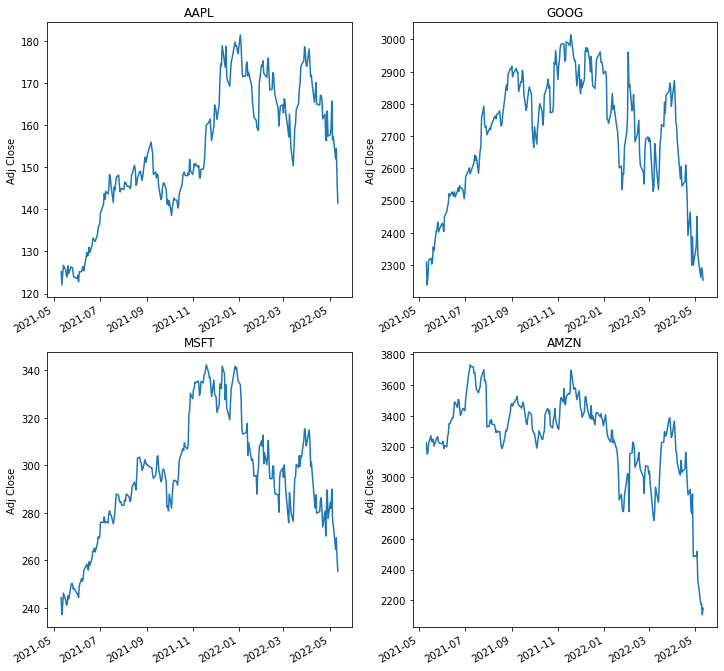

In [27]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

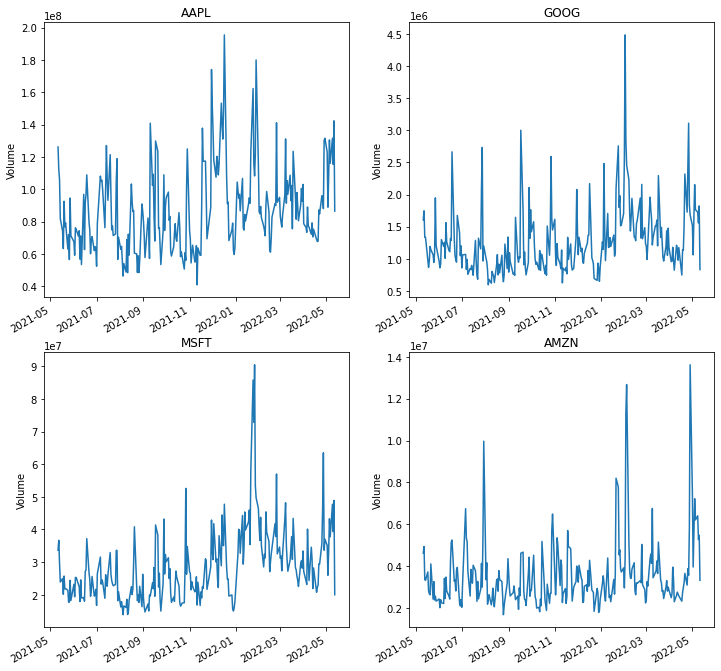

In [28]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")


In [29]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [30]:
print(GOOG.columns) 

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


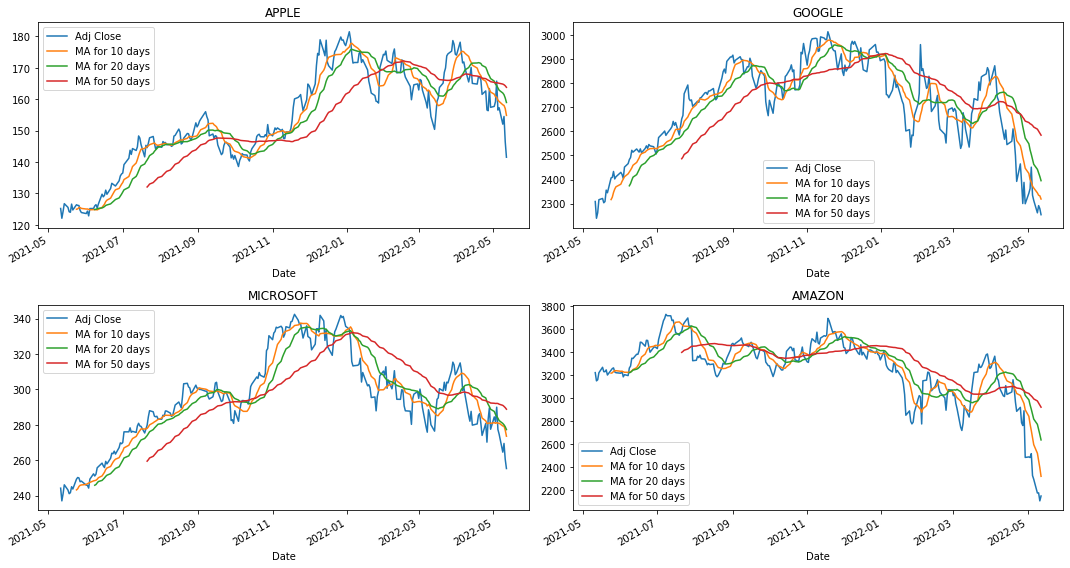

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

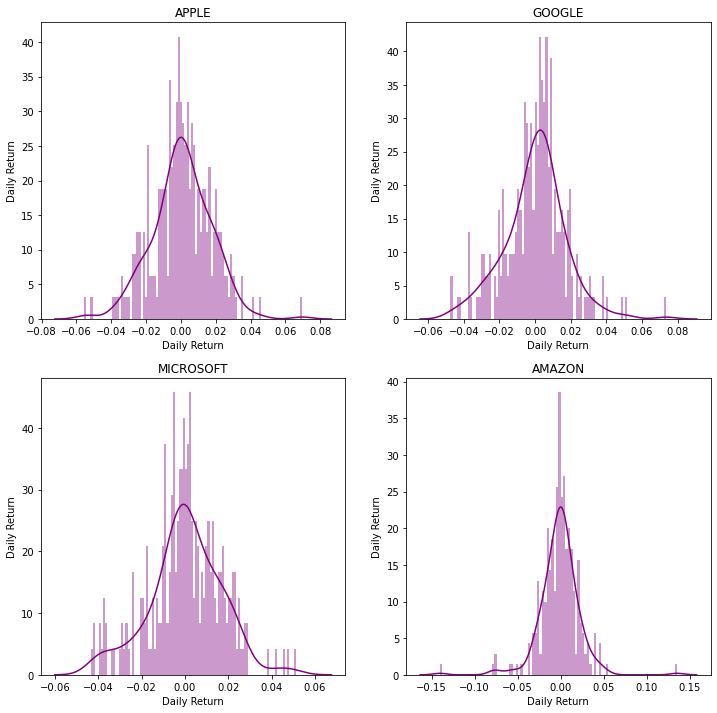

In [32]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

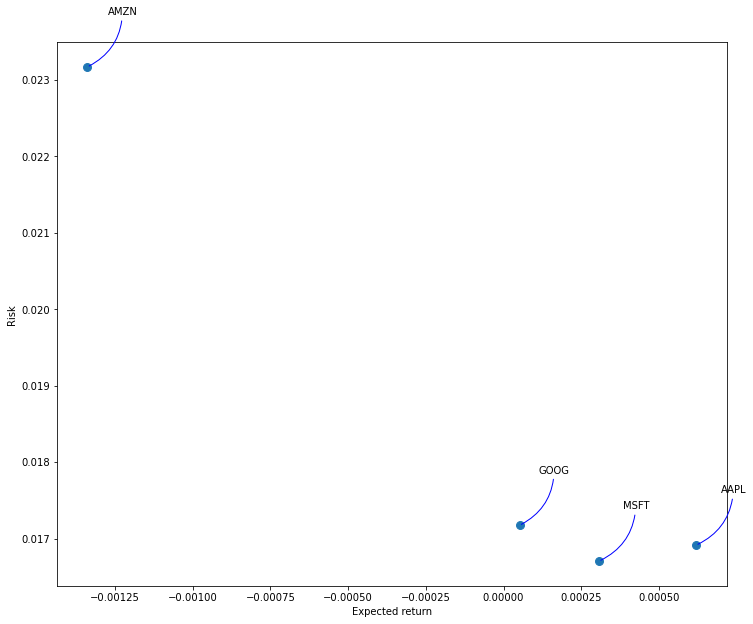

In [33]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
tech_rets = closing_df.pct_change()
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

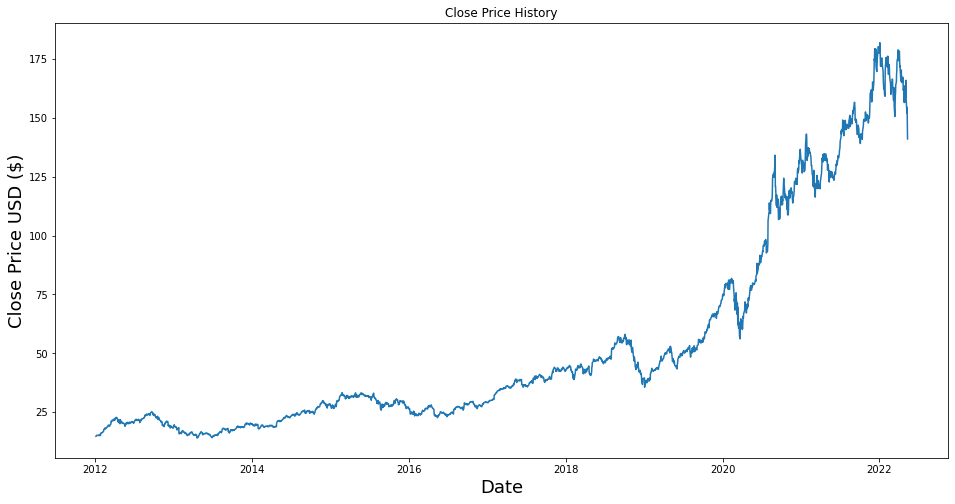

In [34]:
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [39]:
cols = ['Date','News']
ndf = pd.read_csv('news.csv')
ndf 

,"publish_date,headline_category,headline_text"
0,"20010102,unknown,""Status quo will not be distu..."
1,"20010102,unknown,""Fissures in Hurriyat over Pa..."
2,"20010102,unknown,""America's unwanted heading f..."
3,"20010102,unknown,""For bigwigs; it is destinati..."
4,"20010102,unknown,""Extra buses to clear tourist..."
...,...
1048570,"20110123,city.lucknow,""Police recover 100 'imp..."
1048571,"20110123,city.lucknow,""5 new KGBVs for Lucknow"""
1048572,"20110123,india,""70% can't afford sanitary napk..."
1048573,"20110123,city.lucknow,""Cops ask internet cafe;..."


In [38]:
ndf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 1 columns):
 #   Column                                        Non-Null Count    Dtype 
---  ------                                        --------------    ----- 
 0   publish_date,headline_category,headline_text  1048575 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB
